# Introduction

The dataset contains 26 folders (A-Z) containing handwritten images in size 2828 pixels, each alphabet in the image is centre fitted to 2020 pixel box. Each image is stored as Gray-level

I will be creating a handwritten character recognition system that can recognize different handwritten characters or alphabets. 

# Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow import keras

#from keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

# Explore the dataset

In [5]:
data = pd.read_csv('/Users/derek/Desktop/PyCharm./Unit_4_X_DL/data/A_Z Handwritten Data.csv')

In [6]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [8]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [9]:
data.shape

(372450, 785)

Creating a Pandas DataFrame

In [10]:
p = pd.DataFrame(data)
p

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separating the columns for x and y in the dataset

In [11]:
X = p.drop('0',axis = 1)
Y = p['0']

# Changing the shape of the images in a dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
x_train = np.reshape(x_train.values,(x_train.shape[0],28,28))
x_test = np.reshape(x_test.values,(x_test.shape[0],28,28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


# Making a list of letters with their positions

In [13]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

# Plot the number of letters in the dataset

/var/folders/gw/m7333wt957q0gz8nbqnf596h0000gn/T/ipykernel_24437/742214358.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_integer = np.int0(Y)


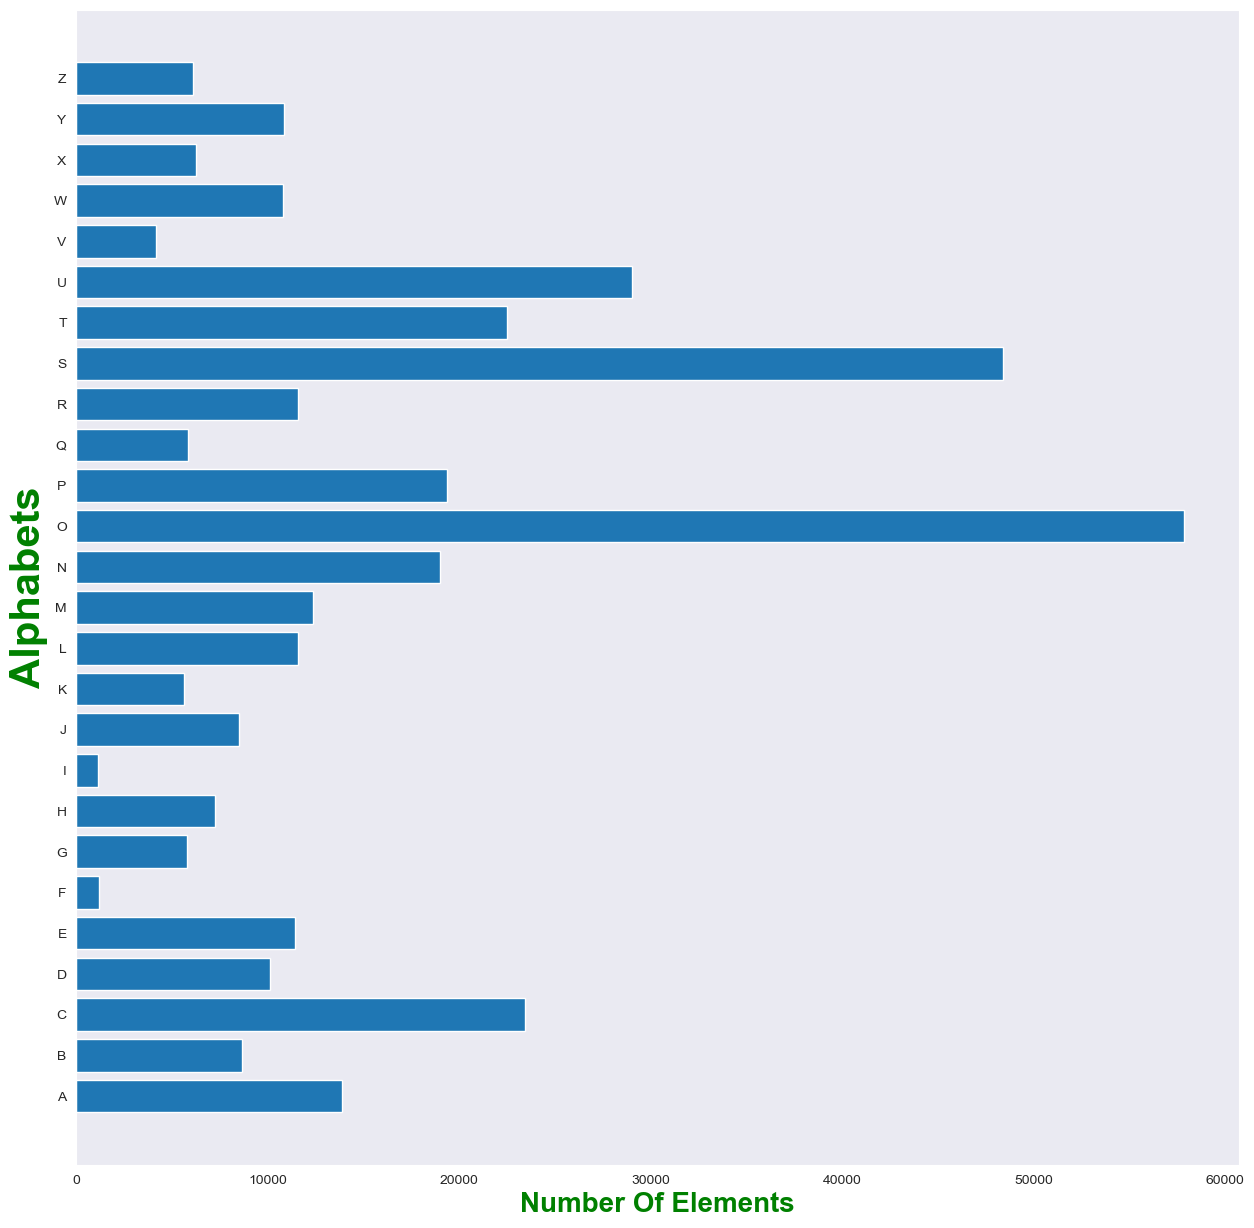

In [14]:
y_integer = np.int0(Y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

# Shuffling 

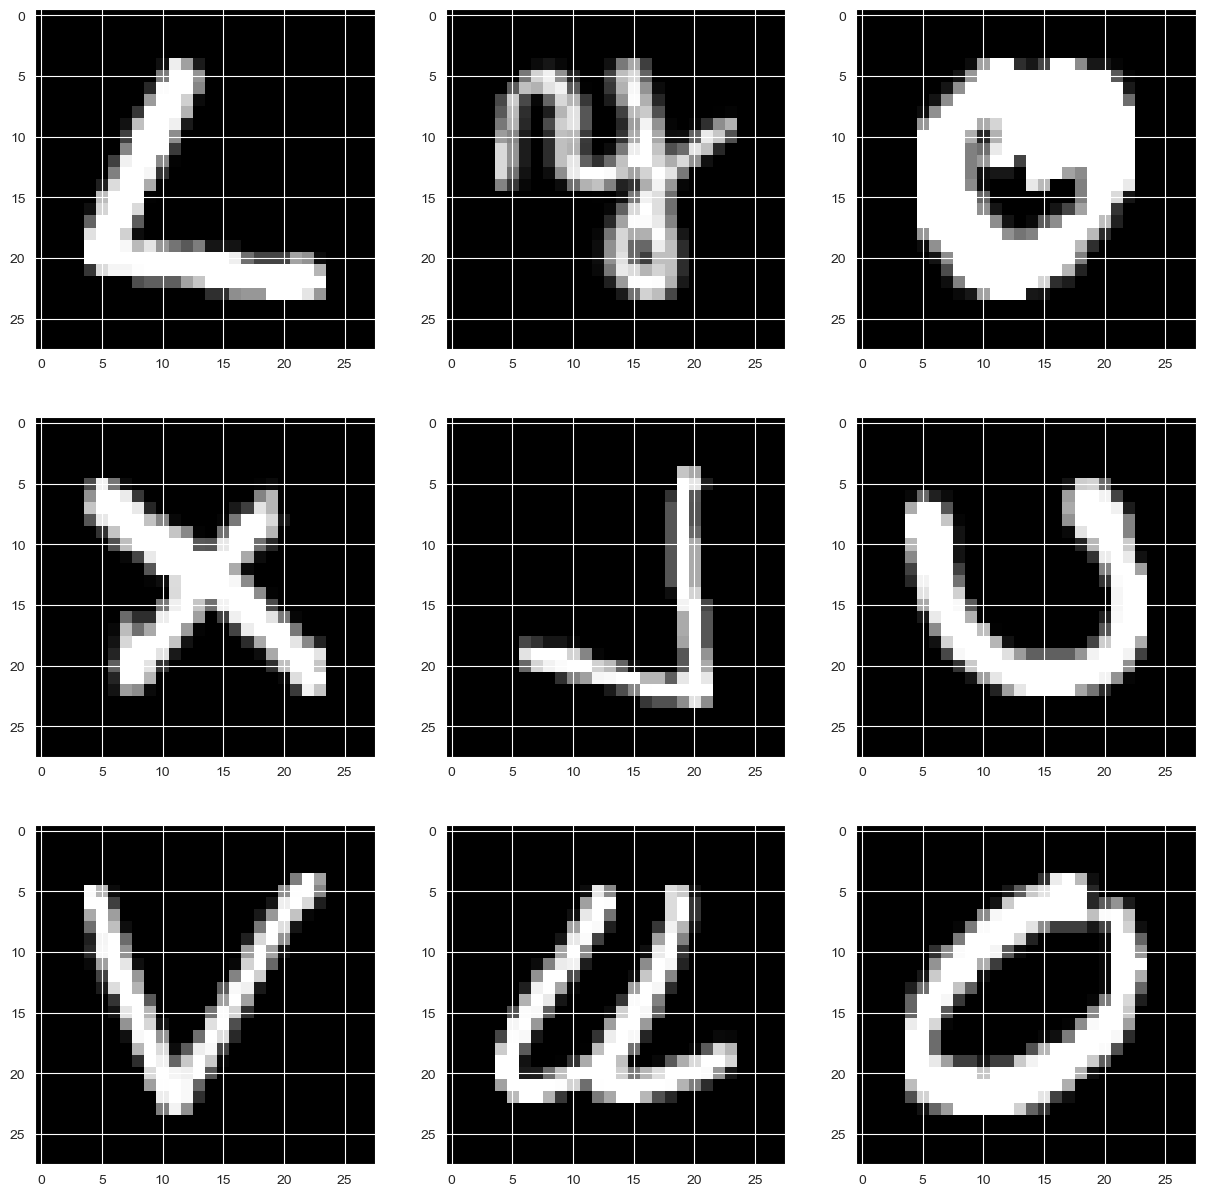

In [15]:
shuff = shuffle(x_train[:100])
fig, ax = plt.subplots (3,3,figsize=(15,15))
axes = ax.flatten()

for i in range (9):
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'gray')

plt.show()

# Reshaping the images in the training and testing datasets to fit into the Deep Learning Model

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


**Implementing one-hot encoding on the target labels for classification tasks, turning integer labels into binary vectors, which is required when working with neural networks for multiclass classification tasks**

In [17]:
# convert class vectors to binary class matrices.  One-hot encoding --> default to float32 as dtype of output array isn't specified
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 26)
print("New shape of train labels:", y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 26)
print("New shape of test labels:", y_test.shape)

print(y_train[0:2])   # verify one-hot encoding

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]


In [18]:
## convert class vectors to binary class matrices.  One-hot encoding --> specified to int

# categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
# print("New shape of train labels:", categorical_train.shape)
# 
# categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
# print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26, 26)
New shape of test labels: (74490, 26, 26)


# Implementing Deep Learning Model

In [25]:
# Define the model
model = Sequential()

# Create a CNN to classify the images
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Compiling the Model

In [32]:
#   define compile to minimize categorical loss, use some optimizers to optimize, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
4656/4656 [==============================] - 63s 13ms/step - loss: 0.1624 - accuracy: 0.9528 - val_loss: 0.0873 - val_accuracy: 0.9766
Epoch 2/10
4656/4656 [==============================] - 61s 13ms/step - loss: 0.1334 - accuracy: 0.9612 - val_loss: 0.0700 - val_accuracy: 0.9814
Epoch 3/10
4656/4656 [==============================] - 62s 13ms/step - loss: 0.1217 - accuracy: 0.9652 - val_loss: 0.0685 - val_accuracy: 0.9823
Epoch 4/10
4656/4656 [==============================] - 63s 13ms/step - loss: 0.1154 - accuracy: 0.9671 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 5/10
4656/4656 [==============================] - 64s 14ms/step - loss: 0.1098 - accuracy: 0.9688 - val_loss: 0.0617 - val_accuracy: 0.9842
Epoch 6/10
4656/4656 [==============================] - 66s 14ms/step - loss: 0.1048 - accuracy: 0.9703 - val_loss: 0.0612 - val_accuracy: 0.9829
Epoch 7/10
4656/4656 [==============================] - 70s 15ms/step - loss: 0.1025 - accuracy: 0.9712 - val_loss: 0.0593 -

# Getting Summary of Model

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 64)         

# Saving the Model Summary

In [34]:
#model.save(r'hand_model_summary.h5')

# Locating the accuracy and losses of the model

Test loss: 0.05662133917212486
Test accuracy: 0.9845348596572876


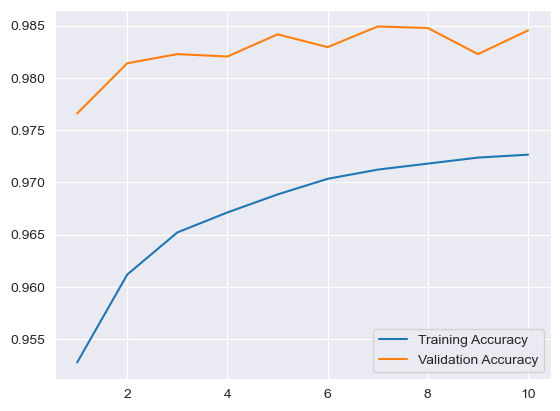

In [35]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
%matplotlib inline

# when epoch > 1
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [40]:
print("The highest validation accuracy is :", max(hist.history['val_accuracy']))
print("The highest training accuracy is :", max(hist.history['accuracy']))
print("The lowest validation loss is :", min(hist.history['val_loss']))
print("The lowest training loss is :", min(hist.history['loss']))

The highest validation accuracy is : 0.9849107265472412
The highest training accuracy is : 0.9726439714431763
The lowest validation loss is : 0.05653438717126846
The lowest training loss is : 0.09907343983650208


# Making Predictions on the Test Data

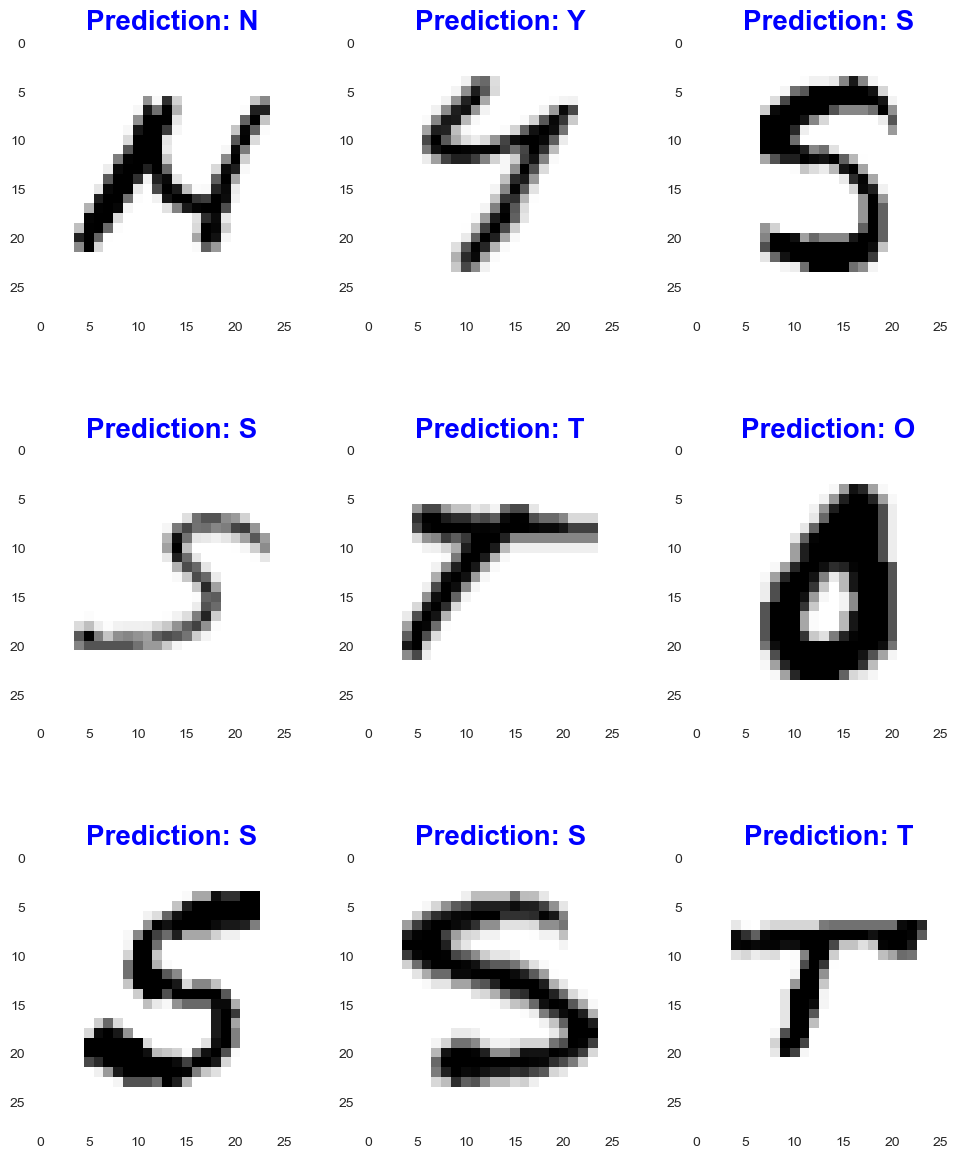

In [52]:
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(12, 15))
axes = axes.flatten()

for ax in axes:
    # Generate a random index
    i = np.random.choice(len(x_test))

    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap='Greys')

    pred = word_dict[np.argmax(y_test[i])]
    ax.set_title("Prediction: " + pred, fontsize=20, fontweight='bold', color='blue')
    ax.grid()